<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/18Apr20_lab_detecting_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Missing Data Lab

## Introduction
We just learned that one of the first problems a data scientist faces when working with a new data set is missing data. This can occur for various reasons, but it is important we determine at the outset of our data exploration process, which of our features have missing values. In the exercises below, you'll practice using some of the methods available to detect missing values.

### King County House Sales
For this lab, we will continue using the King County house sales dataset. Below, load the required libraries and populate a dataframe with the data included in the csv titled "kc_house_data_missing_values.csv".

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Create the dataframe
url = "https://raw.githubusercontent.com/jigsawlabs-student/feature-engineering/master/2-detecting-missing-data-lab/kc_house_data_missing_values.csv"
df = pd.read_csv(url)

In [0]:
#print the first 5 rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors
0,6414100192,"December 09, 2014",538000.0,3,2.25,2570,2.0
1,2487200875,"December 09, 2014",604000.0,4,3.00,1960,1.0
2,1954400510,"February 18, 2015",510000.0,3,2.00,1680,1.0
3,1736800520,"April 03, 2015",662500.0,3,2.50,3560,1.0
4,1175000570,"March 12, 2015",530000.0,5,2.00,1810,1.5


In [0]:
#print the list of features and their data types
df.dtypes

id               int64
date            object
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
floors         float64
dtype: object

Our dataset includes data types integers, strings, and floats. Lets start looking for missing values using the pandas `.isna()` method

In [0]:
#return a count of NaN values in each column
df.isna().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
floors         78
dtype: int64

Using the `.isna` method revealed that we have 78 null values in the floors column. Even though the other features have 0 nulls, they still may exist in other forms not detected by this method. In the next cell, lets use the outlier method to see if there are any unusual values in the price column.

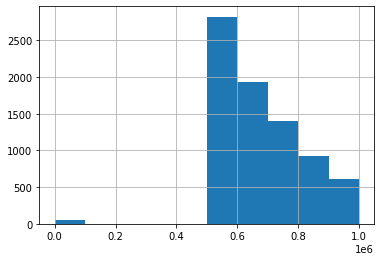

In [0]:
#plot a histogram of the price feature
df.price.hist()

In [0]:
df.price.mean()

671048.1620155039

In the histogram above, almost all of the price values fall in the 400,000 to 1,000,000 range. However, there are a few observations where price seems to be equal to 0 or slightly greater than 0. Since our data is referring to house prices, and we can assume that a house won't be sold for 0 dollars, lets use booleans and `.value_counts` in the cell below to see the number of observations with 0 in the price column

In [0]:
df.price.value_counts().loc[0]

46

For this last exercise, lets look at the date column. At the beginning of the lab we determined that this column has a data type of string. Use `.eq` and `.any` to pull up all rows with empty strings.

In [0]:
df.date.eq('').sum()

0

## Conclusion
There are numerous ways to find the missing values in our data. In this lab we practiced using a few methods to find those values, including Pandas' `.isna` method, histograms, and booleans.